In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

In [4]:
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)
test_seq = pad_sequences(x_test, maxlen = 100)

# 모델 구성

In [7]:
train_seq.shape

(20000, 100)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 100, input_shape = (100,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 64)              │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 55)                  │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/model-cnnrnn-model.keras", save_best_only = True)

In [9]:
history = model.fit(train_seq, y_train, batch_size = 128, epochs = 50,
                   validation_data = (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6303 - loss: 0.6010 - val_accuracy: 0.8404 - val_loss: 0.3476
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8739 - loss: 0.3016 - val_accuracy: 0.8398 - val_loss: 0.3483
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8997 - loss: 0.2515 - val_accuracy: 0.8528 - val_loss: 0.3327
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9217 - loss: 0.2002 - val_accuracy: 0.8398 - val_loss: 0.3759
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9332 - loss: 0.1750 - val_accuracy: 0.8484 - val_loss: 0.3628
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9486 - loss: 0.1489 - val_accuracy: 0.8360 - val_loss: 0.4104
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9583 - loss: 0.1165 - val_accuracy: 0.8424 - val_loss: 0.4377


In [10]:
model.evaluate(test_seq, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8521 - loss: 0.3384


[0.33234500885009766, 0.8539999723434448]

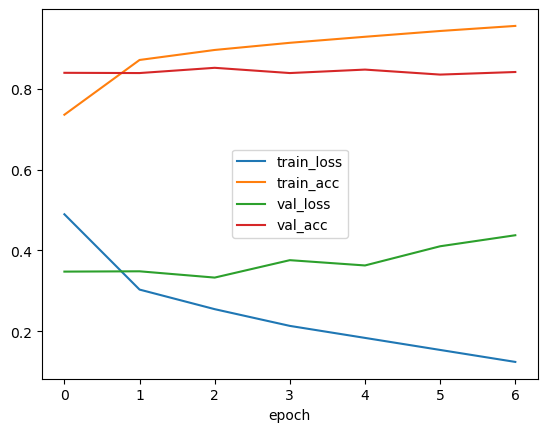

In [11]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend(("train_loss", "train_acc", "val_loss", "val_acc"))
plt.xlabel("epoch")
plt.show()